In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
## groundtruth
gt = pd.read_csv('GroundTruth.txt', sep=" ", header=None)

## adaboost prediction
adaboosts = [None]

for t in range(1, 11):
    adaboosts.append(pd.read_csv(f'Adaboost_pred_{t}.txt', sep=" ", header=None))

# ## yolo prediction
yolo_1 = pd.read_csv('Yolov5_pred_1.txt', sep=" ", header=None)
yolo_2 = pd.read_csv('Yolov5_pred_2.txt', sep=" ", header=None)
yolo_3 = pd.read_csv('Yolov5_pred_3.txt', sep=" ", header=None)
yolo_4 = pd.read_csv('Yolov5_pred_4.txt', sep=" ", header=None)
yolo_5 = pd.read_csv('Yolov5_pred_5.txt', sep=" ", header=None)
yolo_6 = pd.read_csv('Yolov5_pred_6.txt', sep=" ", header=None)
cv = pd.read_csv('CV_pred.txt', sep=" ", header=None)

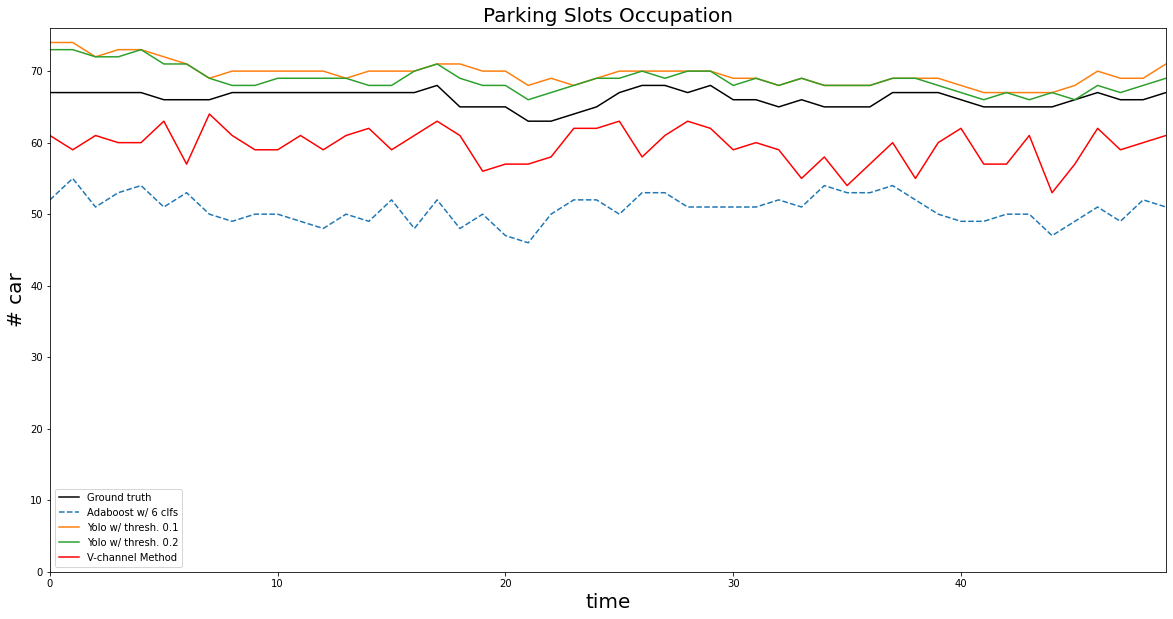

In [41]:
gt_sum = gt.sum(axis = 1)

plt.figure(figsize=(20, 10))

plt.plot(gt_sum, label='Ground truth', color='black')
ts = [6]
for t in ts:
    plt.plot(adaboosts[t].sum(axis=1), "--", label=f"Adaboost w/ {t} clfs")


plt.plot(yolo_1.sum(axis=1), label=f"Yolo w/ thresh. 0.1")
plt.plot(yolo_2.sum(axis=1), label=f"Yolo w/ thresh. 0.2")
# plt.plot(yolo_3.sum(axis=1), label=f"Yolo w/ thresh. 0.3")
# plt.plot(yolo_4.sum(axis=1), label=f"Yolo w/ thresh. 0.4")
# plt.plot(yolo_5.sum(axis=1), label=f"Yolo w/ thresh. 0.5")
# plt.plot(yolo_6.sum(axis=1), label=f"Yolo w/ thresh. 0.6")
plt.plot(cv.sum(axis=1), label=f"V-channel Method", color="red")

plt.xlabel('time', fontsize=20)
plt.ylabel('# car', fontsize=20)
plt.xlim((0,49))
plt.ylim((0,76))
plt.title('Parking Slots Occupation', fontsize=20)
plt.legend(fontsize=10)
plt.savefig('../report/figure/Parking_Slots_Occupation_v.png', bbox_inches='tight')
plt.show()

Average acc. for 6: 0.6357894736842108


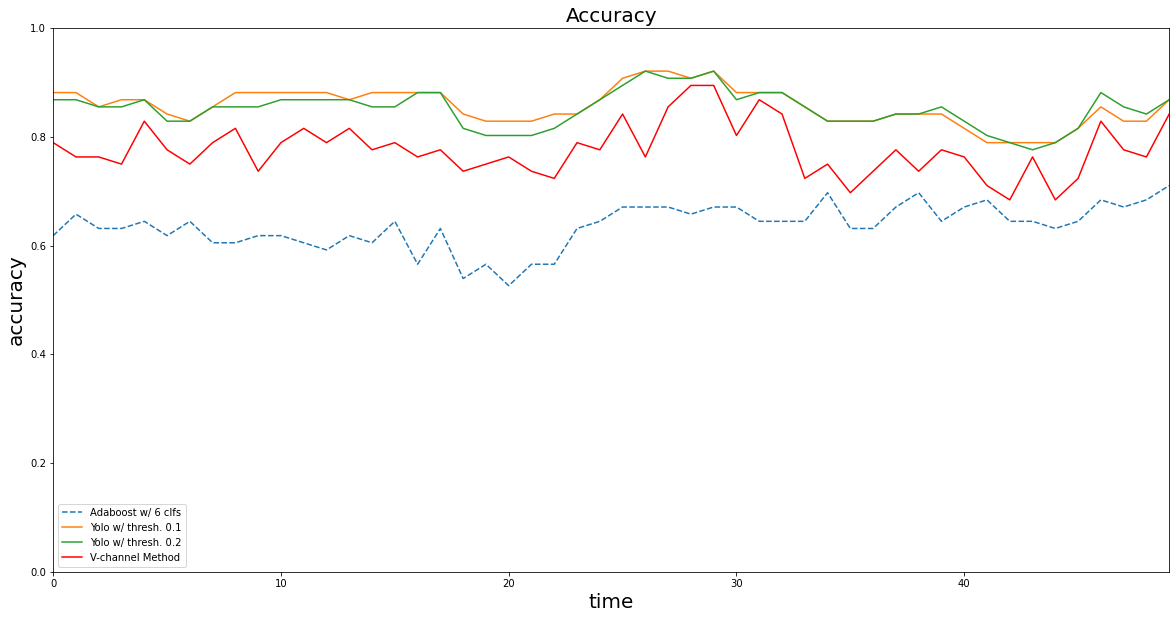

In [39]:
def get_accuracy(df):
    return np.sum(np.equal(gt, df), axis=1) / gt.shape[1]

plt.figure(figsize=(20, 10))

ts = [6]
for t in ts:
    res = get_accuracy(adaboosts[t])
    print(f"Average acc. for {t}: {np.mean(res)}")
    plt.plot(get_accuracy(adaboosts[t]), "--", label=f"Adaboost w/ {t} clfs")
    
plt.plot(get_accuracy(yolo_1), label=f"Yolo w/ thresh. 0.1")
plt.plot(get_accuracy(yolo_2), label=f"Yolo w/ thresh. 0.2")
# plt.plot(get_accuracy(yolo_3), label=f"Yolo w/ thresh. 0.3")
# plt.plot(get_accuracy(yolo_4), label=f"Yolo w/ thresh. 0.4")
# plt.plot(get_accuracy(yolo_5), label=f"Yolo w/ thresh. 0.5")
# plt.plot(get_accuracy(yolo_6), label=f"Yolo w/ thresh. 0.6")
plt.plot(get_accuracy(cv), label=f"V-channel Method", color="red")

plt.xlabel('time', fontsize=20)
plt.ylabel('accuracy', fontsize=20)
plt.xlim((0,49))
plt.ylim((0,1))
plt.title('Accuracy', fontsize=20)
plt.legend(fontsize=10)
plt.savefig('../report/figure/Accuracy_v.png', bbox_inches='tight')
plt.show()

Average F1-score for 6: 0.7627516822761794
0.9194383639894983
0.9158203916974321


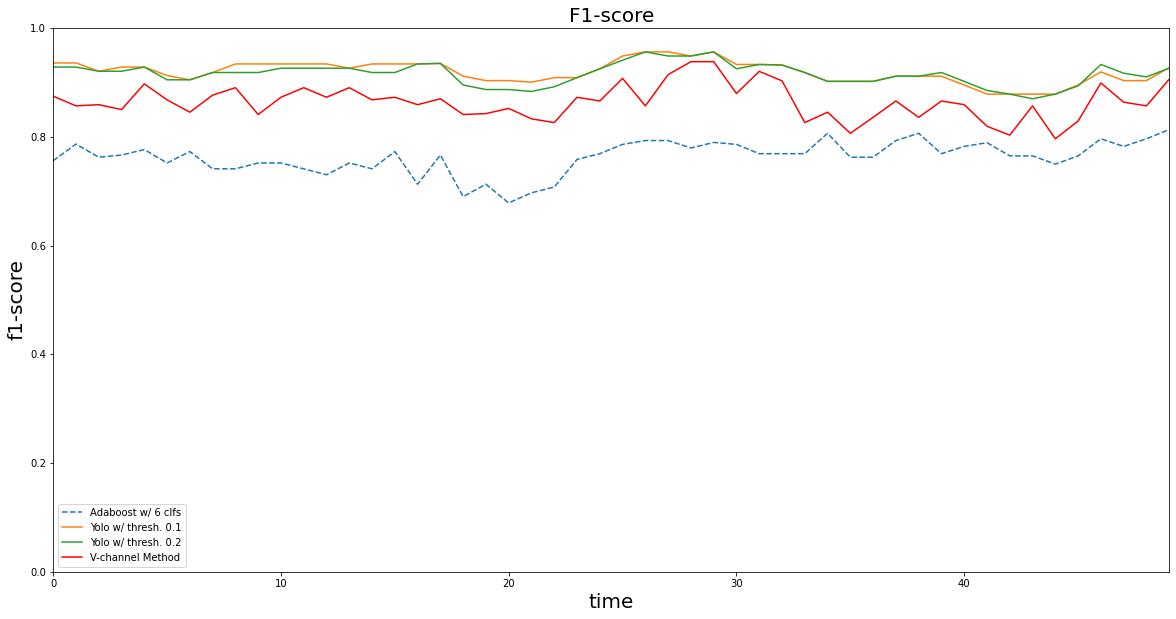

In [40]:
def get_accuracy(df):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    res = []

    for j in range(gt.shape[0]):
        for i in range(gt.shape[1]):
            if df[i][j]:
                if gt[i][j]:
                    tp += 1
                else:
                    fp += 1
            else:
                if gt[i][j]:
                    fn += 1
                else:
                    tn += 1
        precision = tp / (tp + fp + 0.0001)
        recall = tp / (tp + fn + 0.0001)
        res.append(2 * (precision * recall) / (precision + recall + 0.0001))
        tp = 0
        tn = 0
        fp = 0
        fn = 0
    return res

plt.figure(figsize=(20, 10))

ts = [6]
for t in ts:
    res = get_accuracy(adaboosts[t])
    print(f"Average F1-score for {t}: {np.mean(res)}")
    plt.plot(res, "--", label=f"Adaboost w/ {t} clfs")

plt.plot(get_accuracy(yolo_1), label=f"Yolo w/ thresh. 0.1")
plt.plot(get_accuracy(yolo_2), label=f"Yolo w/ thresh. 0.2")
# plt.plot(get_accuracy(yolo_3), label=f"Yolo w/ thresh. 0.3")
# plt.plot(get_accuracy(yolo_4), label=f"Yolo w/ thresh. 0.4")
# plt.plot(get_accuracy(yolo_5), label=f"Yolo w/ thresh. 0.5")
# plt.plot(get_accuracy(yolo_6), label=f"Yolo w/ thresh. 0.6")
plt.plot(get_accuracy(cv), label=f"V-channel Method", color="red")

print(np.mean(get_accuracy(yolo_1)))
print(np.mean(get_accuracy(yolo_2)))

plt.xlabel('time', fontsize=20)
plt.ylabel('f1-score', fontsize=20)
plt.xlim((0,49))
plt.ylim((0,1))
plt.title('F1-score', fontsize=20)
plt.legend(fontsize=10)
plt.savefig('../report/figure/F1-score_v.png', bbox_inches='tight')
plt.show()